# Simulated data from Cosine line

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

A cosine line

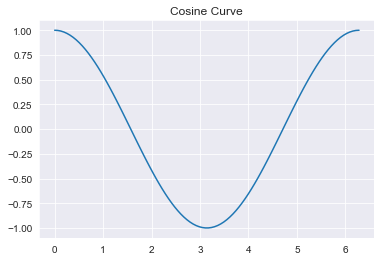

In [2]:
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x)
plt.plot(x,y)
plt.title('Cosine Curve')
plt.show()

Generate points around the curve by adding random noise. These points will be our dataset

Training set created with random seed 567

In [3]:
x = np.linspace(0, 2*np.pi, 100)

np.random.seed(567)
noise = np.random.normal(0, 0.5, 100)

y = np.cos(x)+noise

In [4]:
train = pd.DataFrame({'x':x, 'y':y})
train.head()

,x,y
0,0.000000,1.106633
1,0.063467,0.952037
2,0.126933,0.947280
3,0.190400,1.114807
4,0.253866,1.155981


The curve vs the noise. We want to create a model that will be as close as possible to the cos line

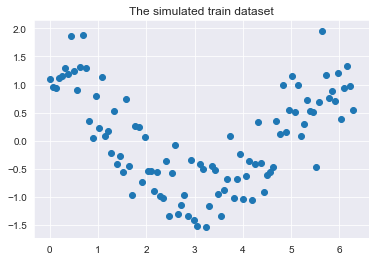

In [5]:
plt.scatter(train.x, train.y)
plt.title('The simulated train dataset')
plt.show()

Train dataset with the cosine curve

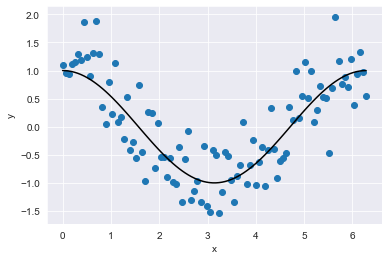

In [6]:
plt.scatter(train.x, train.y)
plt.plot(train.x, np.cos(train.x), color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Linear regression model

The point is to estimate $\beta_0$ and $\beta_1$ in $y = \beta_0 + \beta_1x$. These are the intercept and the x coefficient respectively.

In [7]:
from sklearn.linear_model import LinearRegression
basic_linear_model = LinearRegression()
features = train.drop('y', axis=1)
target = train.y
basic_linear_model.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(basic_linear_model.intercept_)
print(basic_linear_model.coef_)

0.09271652228649466
[-0.0169538]


In [9]:
y_preds = basic_linear_model.predict(features)

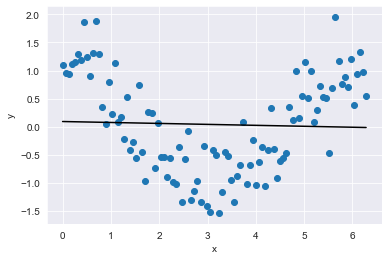

In [10]:
plt.scatter(train.x, train.y)
plt.plot(train.x, y_preds, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Polynomial regression

We will add a 2nd order, and a 3rd order polynomial model and check how well it fits

Let us create a function for reuse that takes a dataframe, separates the features and the target variables, fits the model, and makes predictions, eventually plotting the curve for the predictions.

In [15]:
def model_fitter(data, model):
    features = data.drop('y', axis=1)
    target = data.y
    model.fit(features, target)
    y_preds = model.predict(features)
    plt.scatter(data.x, data.y)
    plt.plot(data.x, y_preds, 'k')
    return model

In [16]:
#2nd order polynomial - add x2 to df
#First we copy the dataframe so we are not editing the original
df2 = train.copy()
df2['x2'] = np.power(df2['x'], 2)
df2.head()

,x,y,x2
0,0.000000,1.106633,0.000000
1,0.063467,0.952037,0.004028
2,0.126933,0.947280,0.016112
3,0.190400,1.114807,0.036252
4,0.253866,1.155981,0.064448


#### 2nd order

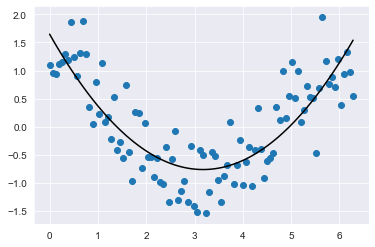

In [17]:
polynomial_second_order = model_fitter(df2, LinearRegression( ))

#### 3rd order

In [21]:
df3 = train.copy()
df3['x2'] = np.power(df3['x'], 2)
df3['x3'] = np.power(df3['x'], 3)
df3.head()

,x,y,x2,x3
0,0.000000,1.106633,0.000000,0.000000
1,0.063467,0.952037,0.004028,0.000256
2,0.126933,0.947280,0.016112,0.002045
3,0.190400,1.114807,0.036252,0.006902
4,0.253866,1.155981,0.064448,0.016361


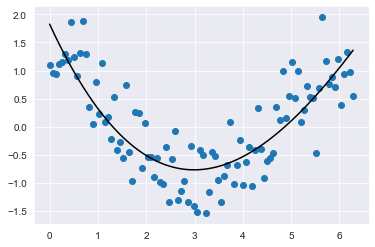

In [22]:
polynomial_third_order = model_fitter(df3, LinearRegression( ))

### Decision Trees

We start with an unconstrained decision tree

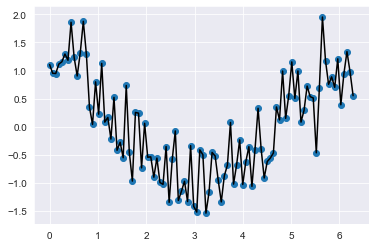

In [23]:
#Use the original df dataset
from sklearn.tree import DecisionTreeRegressor
decision_tree_unconstrained = model_fitter(train, DecisionTreeRegressor( ))

This model is completely overfit.

Let us add a few contraints such as max_depth and min_samples_leaf

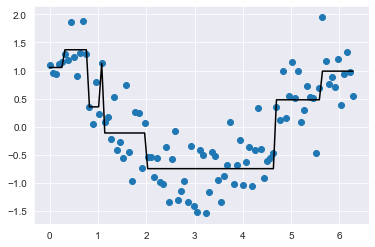

In [24]:
decision_tree_by_depth = model_fitter(train, DecisionTreeRegressor(max_depth = 3))

Constraint by leaf

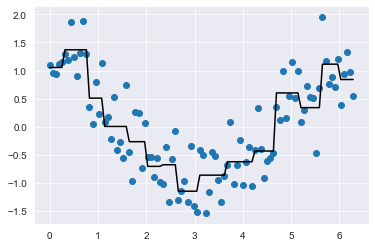

In [25]:
decision_tree_by_leaf = model_fitter(train, DecisionTreeRegressor(min_samples_leaf = 5))

### Random Forests

In [27]:
from sklearn.ensemble import RandomForestRegressor

##### Unconstrained random forest

basic_linear_model, polynomial_second_order, polynomial_third_order, decision_tree_unconstrained, decision_tree_by_depth, decision_tree_by_leaf, random_forest_unconstrained

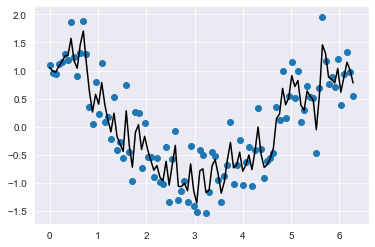

In [28]:
random_forest_unconstrained = model_fitter(train, RandomForestRegressor(random_state=111))

We see that the unconstrained tree is overfit, but not as much as the unconstrained decision tree.

Let us constrain it using the same hyperparameters as those for the decision tree above.

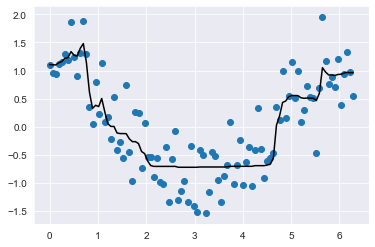

In [29]:
random_forest_by_depth = model_fitter(train, RandomForestRegressor(random_state=111,max_depth=3))

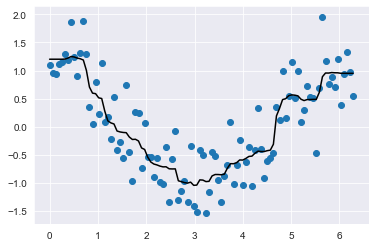

In [30]:
random_forest_by_leaf = model_fitter(train, RandomForestRegressor(random_state=111, min_samples_leaf=5))

## Test Set

We will generate noise from a different random by choosing a different seed. X remains the same, while y will be x + noise(new random noise)

Test set created with random seed 765

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [32]:
x = np.linspace(0, 2*np.pi, 100)

np.random.seed(765)
noise = np.random.normal(0, 0.5, 100)

y = np.cos(x)+noise

In [33]:
test = pd.DataFrame({'x':x, 'y':y})
test.head()

,x,y
0,0.000000,-0.307453
1,0.063467,0.139692
2,0.126933,1.116440
3,0.190400,0.923093
4,0.253866,1.400025


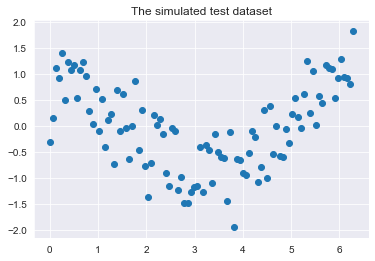

In [34]:
plt.scatter(test.x, test.y)
plt.title('The simulated test dataset')
plt.show()

##### Train (blue) and test (red) sets

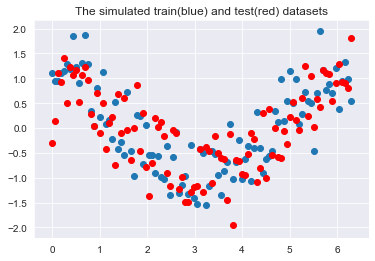

In [35]:
plt.scatter(train.x, train.y)
plt.scatter(test.x, test.y, color='red')
plt.title('The simulated train(blue) and test(red) datasets')
plt.show()

Create test2 and test3 for second-order and third-order polynomial models respectively.

In [39]:
test2 = test.copy()
test2['x2'] = np.power(test2.x, 2)
test_features2 = test2.drop('y', axis=1)

In [40]:
test3 = test.copy()
test3['x2'] = np.power(test3['x'], 2)
test3['x3'] = np.power(test3['x'], 3)
test3.head()

,x,y,x2,x3
0,0.000000,-0.307453,0.000000,0.000000
1,0.063467,0.139692,0.004028,0.000256
2,0.126933,1.116440,0.016112,0.002045
3,0.190400,0.923093,0.036252,0.006902
4,0.253866,1.400025,0.064448,0.016361


Create a function that evaluates the performance on the models and returns the MAE and MSE

In [41]:
def model_performance(data, model, name):
    test_features = data.drop('y', axis=1)
    test_target = data.y
    test_preds = model.predict(test_features)
    mae = mean_absolute_error(test_preds, test_target)
    mse = mean_squared_error(test_preds, test_target)
    print(name)
    print('MAE', np.round(mae,3))
    print('MSE',  np.round(mse, 3))

Run the function for every model

In [42]:
model_performance(test, basic_linear_model, 'Basic linear regression')
model_performance(test2, polynomial_second_order, 'Second Order Polynomial Model')
model_performance(test3, polynomial_third_order, 'Third Order Polynomial Model')
model_performance(test, decision_tree_unconstrained, 'Uncontrained Decision Tree Model')
model_performance(test, decision_tree_by_depth, 'Decision Tree Constrained by max_depth = 3')
model_performance(test, decision_tree_by_leaf, 'Decision Tree Constrained by min_samples_leaf = 5')
model_performance(test, random_forest_unconstrained, 'Unconstrained Random Forest')
model_performance(test, random_forest_by_depth, 'Random Forest Constrained by max_depth = 3')
model_performance(test, random_forest_by_leaf, 'Random Forest Constrained by min_samples_leaf = 5')

Basic linear regression
MAE 0.677
MSE 0.669
Second Order Polynomial Model
MAE 0.427
MSE 0.277
Third Order Polynomial Model
MAE 0.433
MSE 0.297
Uncontrained Decision Tree Model
MAE 0.523
MSE 0.434
Decision Tree Constrained by max_depth = 3
MAE 0.441
MSE 0.289
Decision Tree Constrained by min_samples_leaf = 5
MAE 0.427
MSE 0.287
Unconstrained Random Forest
MAE 0.47
MSE 0.333
Random Forest Constrained by max_depth = 3
MAE 0.424
MSE 0.28
Random Forest Constrained by min_samples_leaf = 5
MAE 0.416
MSE 0.276
